## Properties estimators

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ipqa-research/ugropy/blob/main/docs/source/tutorial/properties_estimators.ipynb)

Some group contribution models could be used to predict properties of pure
substances.

### Joback model

The Joback model is a well known model to estimate properties of pure 
substances. We can use it independently of the Groups class by doing:

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  %pip install ugropy

In [1]:
from ugropy import joback

toluene = joback.get_groups("toluene")

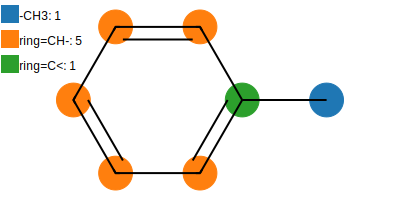

In [2]:
toluene.draw(width=400)

In [3]:
print(toluene.critical_pressure)
print(toluene.critical_volume)
print(toluene.critical_temperature)
print(toluene.acentric_factor)
print(toluene.fusion_temperature)

41.144119209325225 bar
319.5 centimeter ** 3 / mole
598.0611700010388 kelvin
0.25208296412216535 dimensionless
195.07 kelvin


You may notice that the attributes of the `Joback` class are numbers with 
units. This is possible thanks to the `pint` library. The `pint` library
allows us to work with units in a very simple way. For example, we can
convert the value of the `critical_pressure` attribute to pascal by doing:

In [5]:
toluene.critical_pressure.to("Pa")

<Quantity(4114411.92, 'pascal')>

If you want to obtain the value of the attribute without units, you can
use the `magnitude` attribute:

In [6]:
toluene.critical_pressure.magnitude

np.float64(41.144119209325225)

Or combine all that we know:

In [8]:
toluene.critical_pressure.to("mmHg").magnitude

np.float64(30860.62289092802)

For more information about the `pint` library, you can visit their 
documentation.

On the other hand, we can use the `Joback` class to estimate
temperature-dependent properties of the molecule (also with `pint` units). In
the API documentation you can check the available methods to estimate
properties and how its done.

In [10]:
print(toluene.vapor_pressure(110 + 273.15))

0.923433500943906 bar


In [11]:
print(toluene.viscosity_liquid(25 + 273.15))

0.0004848511681835698 pascal * second


In [12]:
print(toluene.heat_capacity_liquid(50 + 273.15))

174.140191226778 joule / kelvin / mole


In [13]:
toluene.heat_capacity_ideal_gas(150 + 273.15)

<Quantity(150.130048, 'joule / mole / kelvin')>

You can check the full documentation and check all the properties you can 
estimate by doing:

In [14]:
?toluene

Type:        JobackFragmentationResult
String form: <ugropy.core.frag_classes.joback.joback_result.JobackFragmentationResult object at 0x7f18d201a470>
File:        ~/code/ugropy/ugropy/core/frag_classes/joback/joback_result.py
Docstring:  
Joback group contribution properties estimator.

The class recieves either the Joback and Reid model's :cite:p:`joback1,
joback2` groups, name or smiles of a molecule and estimates the its
properties.

Parameters
----------
molecule : Chem.rdchem.Mol
    RDKit molecule object.
subgroups : dict
    Dictionary of subgroups.
subgroups_atoms_indexes : dict
    Dictionary of subgroups atoms indexes.
properties_contributions : pd.DataFrame
    DataFrame with Joback's properties contributions.
normal_boiling_point : float, optional
    User provided experimental normal boiling point [K].

Attributes
----------
subgroups : dict
    Joback functional groups of the molecule.
experimental_boiling_temperature : pint.Quantity
    User provided experimental normal

Joback model allows the user to provide the experimental normal boiling
temperature of the subtance to increase the accuracy of some properties
estimations. This value will be used instead of the Joback estimated normal
boiling temperature to calculate some properties, for example the critical
temperature.

In [15]:
toluene = joback.get_groups("toluene", normal_boiling_point=(110.6 + 273.15))

In [17]:
print(toluene.critical_temperature)

593.8980798775972 kelvin


In [18]:
print(toluene.vapor_pressure(110.6 + 273.15))

1.0132500000000007 bar


### Abdulelah-Gani model

https://github.com/PEESEgroup/Pure-Component-Property-Estimation

The recently developed Abdulelah-Gani model is also available in `ugropy`. This
model is on an early stage of development and it is not as complete as the 
original publication. Some of tertiary structures are not yet implemented and 
for that, the properties that depend on them are not available. Let's see how
to use it:

In [50]:
from ugropy import abdulelah_gani

In [51]:
adrenaline = abdulelah_gani.get_groups("adrenaline")

In [52]:
adrenaline.primary.subgroups

{'CH3': 1, 'aCH': 3, 'aC-CH': 1, 'OH': 1, 'aC-OH': 2, 'CH2NH': 1}

In [53]:
adrenaline.secondary.subgroups

{'CHm(OH)CHn(NHp) (m,n,p in 0..2)': 1,
 'aC-CHn-OH (n in 1..2)': 1,
 'AROMRINGs1s2s4': 1}

In [54]:
adrenaline.tertiary.subgroups

{}

As you can see, The Abdulelah-Gani model includes different kinds of subgropus.
The primary structures works as the other models we have discussed before. The
secondary and tertiary are additional structures that are used to increase
the accuracy of the estimations. Also, differentiates isomers. For example:

In [55]:
hexa23 = abdulelah_gani.get_groups("2,3-dimethylhexane")
hexa24 = abdulelah_gani.get_groups("2,4-dimethylhexane")

In [56]:
hexa23.critical_temperature

<Quantity(564.841866, 'kelvin')>

In [57]:
hexa24.critical_temperature

<Quantity(549.393276, 'kelvin')>

In [58]:
print(hexa23.primary.subgroups)
print(hexa24.primary.subgroups)

{'CH3': 4, 'CH2': 2, 'CH': 2}
{'CH3': 4, 'CH2': 2, 'CH': 2}


In [ ]:
print(hexa23.secondary.subgroups)
print(hexa24.secondary.subgroups)

{'(CH3)2CH': 1, 'CH(CH3)CH(CH3)': 1}
{'(CH3)2CH': 1}


As you can see, both molecules have the same primary structure but different
secondary structures. This is why the properties are different. On a Property 
Estimator that only have primary structures like the Joback model we would get
the same properties for both molecules.

In [60]:
print(joback.get_groups("2,3-dimethylhexane").critical_temperature)
print(joback.get_groups("2,4-dimethylhexane").critical_temperature)

552.9339856842008 kelvin
552.9339856842008 kelvin


All the properties that can be estimated with the Abdulelah-Gani model are:

In [61]:
print(hexa23.critical_temperature)
print(hexa23.critical_pressure)
print(hexa23.critical_volume)
print(hexa23.acentric_factor)
print(hexa23.ig_formation_enthalpy)
print(hexa23.ig_formation_gibbs)

564.8418659474339 kelvin
26.35038783694938 bar
465.335 centimeter ** 3 / mole
0.35672642267081217 dimensionless
-214.82596509091175 kilojoule / mole
15.59002996305599 kilojoule / mole


If you refer yo the original publication you will notice that the 
Abdulelah-Gani model allows to estimate the properties by to methods:

- GC-SIMPLE: Algebraic correlations
- ML: trained neural networks

`ugropy` evaluates the properties using the GC-SIMPLE method. The ML method
is not provided in this library. To learn how evaluate the properties with the
ML method, please refer to the original publication supplementary material:

https://github.com/PEESEgroup/Pure-Component-Property-Estimation

However, `ugropy`helps you a little to evaluate the trained neural networks.
The fragmentation results give you the numpy array needed to evaluate the ML 
model ready to use:

In [62]:
hexa23.ml_vector

array([[4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

To visualize the fragmentation results you can use the `draw` method
for each structure type:

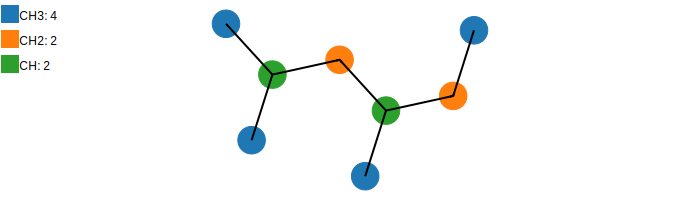

In [71]:
hexa24.primary.draw(width=700)

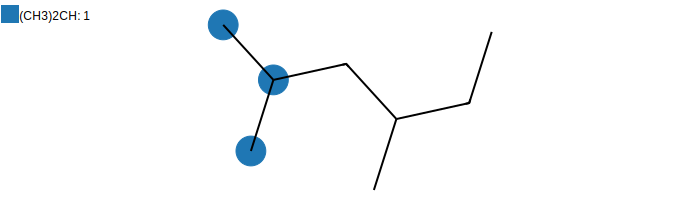

In [72]:
hexa24.secondary.draw(width=700)

The example molecules doesn't have tertiary structures, let's get the solution
for a molecule that has tertiary structures:

In [73]:
fluorene = abdulelah_gani.get_groups("9H-Fluorene")

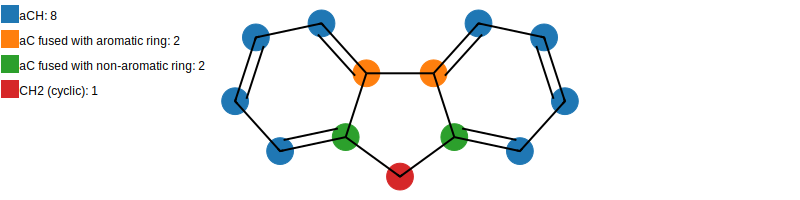

In [76]:
fluorene.primary.draw(width=800)

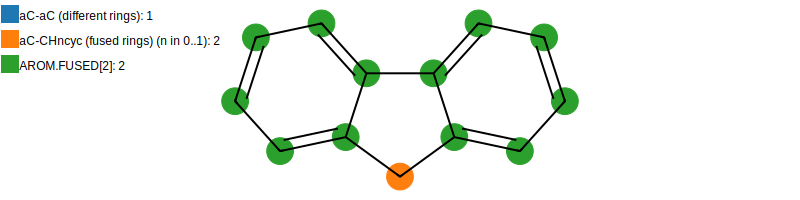

In [77]:
fluorene.tertiary.draw(width=800)

Finally, getting multiple solutions. Secondary and tertiary structures can
be overlapped so they doesn't generate multiple solutions. But of course, the
primary structures will generate multiple solutions. Let's see an example:

In [78]:
mol = abdulelah_gani.get_groups("COc1ccccc1N(=O)=O", "smiles", search_multiple_solutions=True)

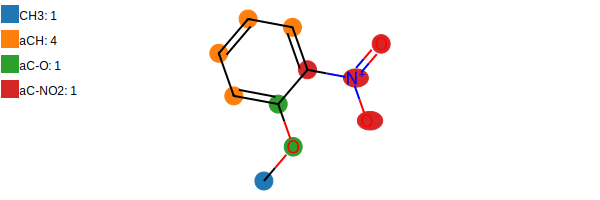

In [84]:
mol[0].primary.draw(width=600)

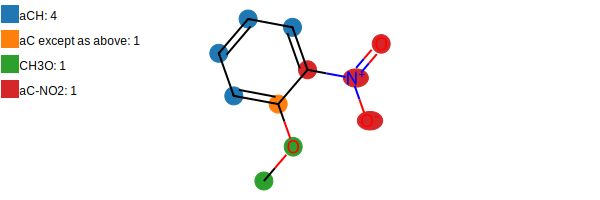

In [85]:
mol[1].primary.draw(width=600)

Both solutions have the same secondary and tertiary results, but different
primary results. This is why the properties are different.

In [88]:
mol[0].critical_temperature

<Quantity(750.949962, 'kelvin')>

In [89]:
mol[1].critical_temperature

<Quantity(784.28914, 'kelvin')>

What a difference!! In this case, the second solution provides a much better
estimation of critical temperature (782 K). You can check it by yourself on
the publication original dataset.